# **Waste Management using CNN Model**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:05<00:00, 88.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
# Implimenting Various Libraries
import numpy as np
import pandas as pd
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

In [31]:
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

In [11]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
import glob

In [7]:
#Visualization
x_data = []
y_data = []
for category in glob.glob(train_path+'/*'):
    for file in tqdm(glob.glob (category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2060.19it/s]


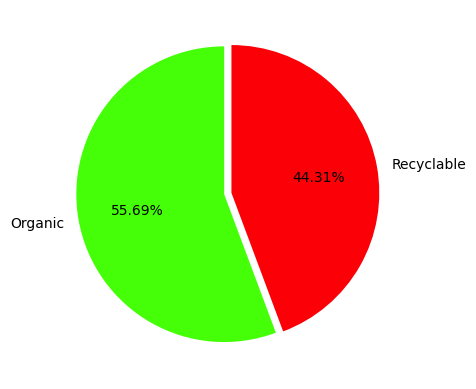

In [8]:
data.shape
colors =['#44FF07','#FB0007']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()

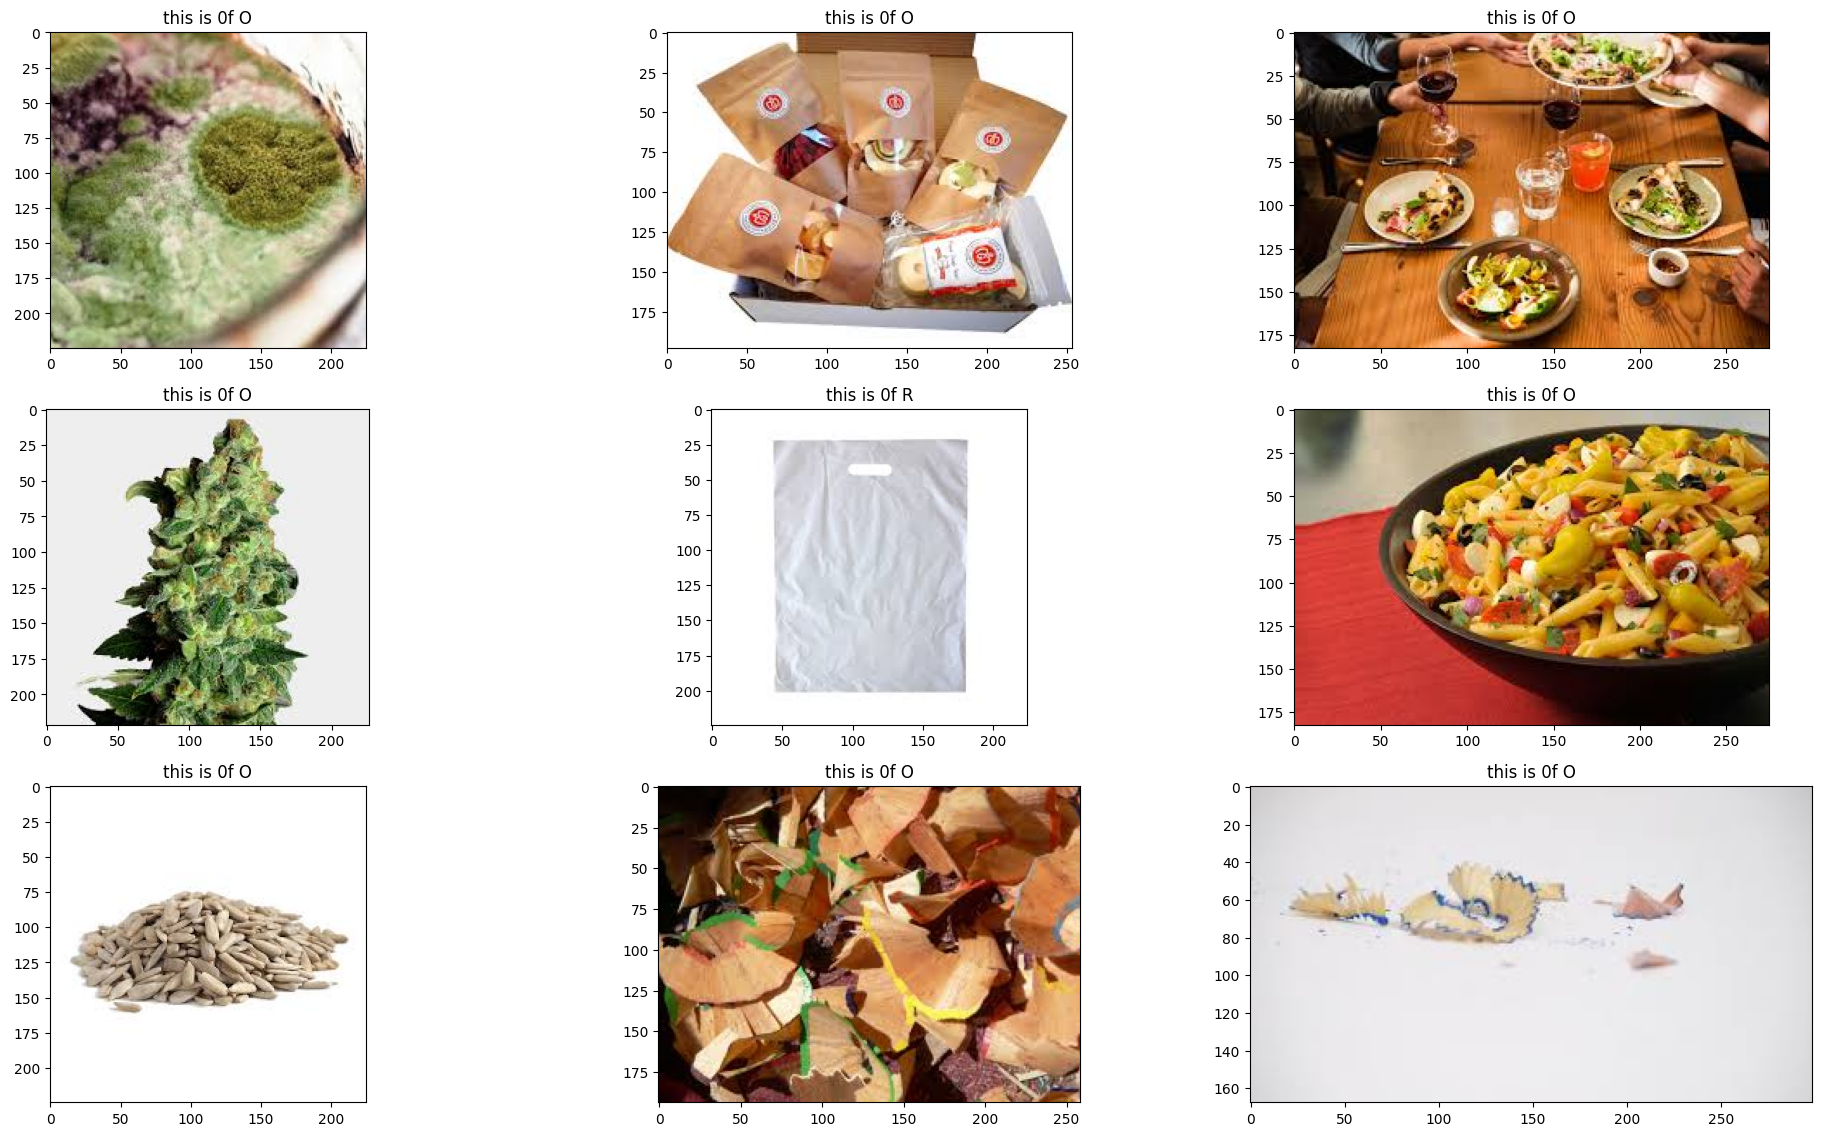

In [36]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('this is 0f {0}'.format(data['label'][index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


In [48]:

model= Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
batch_size =64



In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [38]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [49]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
    )

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 75s 178ms/step - accuracy: 0.7671 - loss: 0.5371 - val_accuracy: 0.8261 - val_loss: 0.3779
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8328 - loss: 0.4024 - val_accuracy: 0.9017 - val_loss: 0.2838
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.8584 - loss: 0.3499 - val_accuracy: 0.8683 - val_loss: 0.3116
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.8785 - loss: 0.3146 - val_accuracy: 0.9121 - val_loss: 0.2376
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.8896 - loss: 0.2790 - val_accuracy: 0.8854 - val_loss: 0.2947
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9164 - loss: 0.2221 - val_accuracy: 0.9101 - val_loss: 0.3058
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.9365 - loss: 0.1703 - val_accuracy: 0.8842 - val_loss: 0.3826
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.9547 - loss: 0

# *Accuracy, Losses & Testing*